**КР-2. Вариант 3.**

**1. Найти уравнение касательной и нормали к графику функции $y=f(x)$ в точке $x_0$. Построить графики функции, касательной и нормали: $f(x)=ln(1+x^2), x_0=1$.**

*Найдем производную:*

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import optimize

x = sp.Symbol("x")
y = sp.log(1 + x**2)
print("Производная:", y.diff())

Производная: 2*x/(x**2 + 1)


Уравнение касательной: x - 0.306852819440055
Уравнение нормали: 1.69314718055995 - x


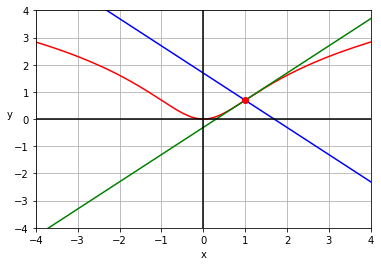

In [125]:
def f(x):
    return np.log(1 + x**2)


def der(x_podst):
    y = 2 * x / (x**2 + 1)
    return y.subs(x, x_podst)


x_0 = 1
x = sp.Symbol("x")

# уравнение касательной в точке x0
y = der(x_0) * (x - x_0) + f(x_0)
print("Уравнение касательной:", y)

# уравнение нормали в точке x0
y = f(x_0) - (x - x_0) / der(x_0)
print("Уравнение нормали:", y)

# построение функции (красный цвет)
x = np.arange(-10, 10, 0.01)
plt.plot(x, f(x), "r")

# построение касательной (зеленый цвет)
x = np.arange(-10, 10, 0.01)
plt.plot(x, x - 0.306852819440055, "g")

# построение нормали (синий цвет)
x = np.arange(-10, 10, 0.01)
plt.plot(x, 1.69314718055995 - x, "b")

# построение точки
plt.plot(x_0, f(x_0), "ro")

# установить границы оси
plt.ylim(-4, 4)
plt.xlim(-4, 4)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

**2. Разложить функцию $f(x)$ по степеням $x-x_0$ до 3-го и 4-го порядков. Построить графики функции и многочленов Тейлора на промежутке $[x_0-1; x_0+1]$: $f(x)=sin(x^2+x)$, $x_0=-2$.**

3 порядок: 1.25*x + 0.855*(x + 2)**3 - 4.51*(x + 2)**2 + 3.41
4 порядок: 1.25*x + 4.4871*(x + 2)**4 + 0.855*(x + 2)**3 - 4.51*(x + 2)**2 + 3.41


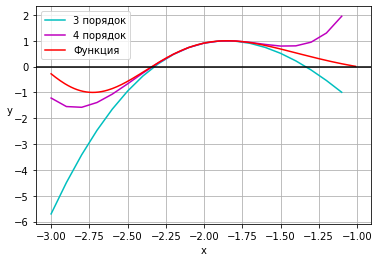

In [126]:
import numpy as np
from sympy import *
import math
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x**2 + x)


def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    return collectTaylor(x0, n, vec)


def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    return eq


def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr


def getTaylorValue(f, n, point):
    for i in range(n + 1):
        eee = getTaylor([point, i, getFuncDerValue(function, point, i)])
        drawTaylor(eee, i)


def drawTaylor(f, num):
    if num == 3 or num == 4:
        print(str(num) + " порядок:", f)
        arr_colors = ["k", "g", "r", "c", "m", "y", "b"]
        x_graph = np.arange(-2 - 1, -2 + 1, 0.1)
        y_graph = []
        for i in range(len(x_graph)):
            y_graph.append(f.evalf(subs={x: x_graph[i]}))
        plt.plot(
            x_graph,
            y_graph,
            arr_colors[num % len(arr_colors)],
            label=str(num) + " порядок",
        )


###############################################
x = Symbol("x")
function = sin(x**2 + x)
n = 4
point = -2
getTaylorValue(function, n, point)
######################################################

# построение функции (красный цвет)
x = np.arange(point - 1, point + 1, 0.01)
plt.plot(x, f(x), "r", label="Функция")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
# вывести легенду графиков
plt.legend()
plt.show()


**3. Построить график функции $f(x)$. Найти область определения, нули функции, точки экстремума и значения в них, точки перегиба, значения в них, значения тангенса угла наклона касательной  в точке перегиба, найти односторонние пределы в точках разрыва, уравнения асимптот. Обозначить на графике  экстремумы, построить касательные в окрестностях точек перегиба, асимптоты. Указать множество значений. <big><big>$f(x)=\frac{2x^3-3x+2}{x^2+2x-3}$**<big><big>

Область определения:

In [127]:
x = Symbol("x")
print("x не равен:", solve(x**2 + 2 * x - 3, x))

x не равен: [-3, 1]


Нули функции:

Корень уравнения 1: -1.4756865177957101


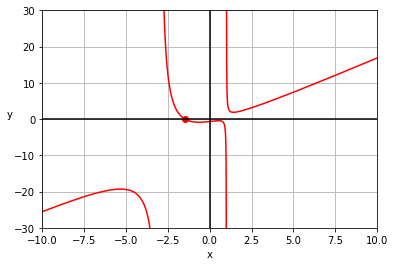

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


def f(x):
    return (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)


# нули функции
x1 = optimize.brentq(f, -2.5, -0.5)
print("Корень уравнения 1:", x1)

# построение точек нулей функции
plt.plot(x1, 0, "ro")

# построение функции
x = np.linspace(-10, -3.0001, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(-2.9999, 0.9999, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(1.0001, 10, 5000)
plt.plot(x, f(x), "r")

# установить границы оси
plt.ylim(-30, 30)
plt.xlim(-10, 10)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

Точки экстремума:

*Найдем производную:*

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import optimize

x = sp.Symbol("x")
y = (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)
print(y.diff())

(-2*x - 2)*(2*x**3 - 3*x + 2)/(x**2 + 2*x - 3)**2 + (6*x**2 - 3)/(x**2 + 2*x - 3)


Точка экстремума 1: -5.322038541887159 - Максимум Значение: -19.313174076312183
Точка экстремума 2: -0.6246695370638563 - Минимум Значение: -0.8775304456151176
Точка экстремума 3: 0.5312807673785104 - Максимум Значение: -0.42658554365579016
Точка экстремума 4: 1.4154273115727631 - Минимум Значение: 1.8672900655830946


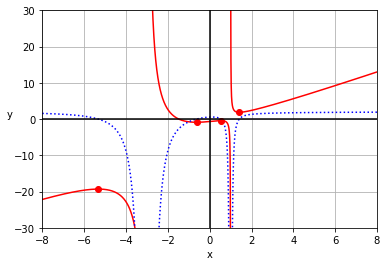

In [130]:
def f(x):
    return (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)


def der(x_podst):
    y = (-2 * x - 2) * (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3) ** 2 + (
        6 * x**2 - 3
    ) / (x**2 + 2 * x - 3)
    return y.subs(x, x_podst)


def checkExtremum(f, x):
    eps = 0.001
    if f(x) - f(x - eps) > 0:
        return "Максимум"
    return "Минимум"


# построение функции
x = np.linspace(-10, -3.0001, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(-2.9999, 0.9999, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(1.0001, 10, 5000)
plt.plot(x, f(x), "r")

# построение производной
x = sp.Symbol("x")
x_plt = np.arange(-10, 10, 0.01)
y_plt = []
for i in range(len(x_plt)):
    y_plt.append(der(x_plt[i]))
plt.plot(x_plt, y_plt, "b:")


# точки экстремума
x1 = optimize.brentq(der, -6, -4)
print("Точка экстремума 1:", x1, "-", checkExtremum(f, x1), "Значение:", f(x1))
x2 = optimize.brentq(der, -2, 0)
print("Точка экстремума 2:", x2, "-", checkExtremum(f, x2), "Значение:", f(x2))
x3 = optimize.brentq(der, 0, 0.99)
print("Точка экстремума 3:", x3, "-", checkExtremum(f, x3), "Значение:", f(x3))
x4 = optimize.brentq(der, 1.1, 2)
print("Точка экстремума 4:", x4, "-", checkExtremum(f, x4), "Значение:", f(x4))

# построение точек экстремума
plt.plot(x1, f(x1), "ro")
plt.plot(x2, f(x2), "ro")
plt.plot(x3, f(x3), "ro")
plt.plot(x4, f(x4), "ro")

# установить границы оси
plt.ylim(-30, 30)
plt.xlim(-8, 8)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

Точки перегиба:

*Найдем вторую производную:*

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import optimize

x = sp.Symbol("x")
y = (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)
y = y.diff()
print(y.diff())

12*x/(x**2 + 2*x - 3) + (-4*x - 4)*(-2*x - 2)*(2*x**3 - 3*x + 2)/(x**2 + 2*x - 3)**3 + 2*(-2*x - 2)*(6*x**2 - 3)/(x**2 + 2*x - 3)**2 - 2*(2*x**3 - 3*x + 2)/(x**2 + 2*x - 3)**2


Точка перегиба 1: 0.11178182644262943 Значение: -0.603286352794295


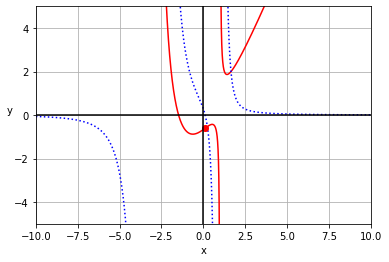

In [133]:
def f(x):
    return (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)


def der_2(x_podst):
    y = 12*x/(x**2 + 2*x - 3) + (-4*x - 4)*(-2*x - 2)*(2*x**3 - 3*x + 2)/(x**2 + 2*x - 3)**3 + 2*(-2*x - 2)*(6*x**2 - 3)/(x**2 + 2*x - 3)**2 - 2*(2*x**3 - 3*x + 2)/(x**2 + 2*x - 3)**2
    return y.subs(x, x_podst)


# построение функции
x = np.linspace(-10, -3.0001, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(-2.9999, 0.9999, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(1.0001, 10, 5000)
plt.plot(x, f(x), "r")

# построение второй производной
x = sp.Symbol("x")
x_plt = np.arange(-10, -3.01, 0.01)
y_plt = []
for i in range(len(x_plt)):
    y_plt.append(der_2(x_plt[i]))
plt.plot(x_plt, y_plt, "b:")
x_plt = np.arange(-2.99, 0.99, 0.01)
y_plt = []
for i in range(len(x_plt)):
    y_plt.append(der_2(x_plt[i]))
plt.plot(x_plt, y_plt, "b:")
x_plt = np.arange(1.01, 10, 0.01)
y_plt = []
for i in range(len(x_plt)):
    y_plt.append(der_2(x_plt[i]))
plt.plot(x_plt, y_plt, "b:")

# точки перегиба
x1 = optimize.brentq(der_2, -1, 0.99)
print("Точка перегиба 1:", x1, "Значение:", f(x1))

# построение точек перегиба
plt.plot(x1, f(x1), "ro")

# установить границы оси
plt.ylim(-5, 5)
plt.xlim(-10, 10)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

Касательная к точке перегиба:

Значение тангенса угла наклона касательной в точке перегиба:  0.572943936098054


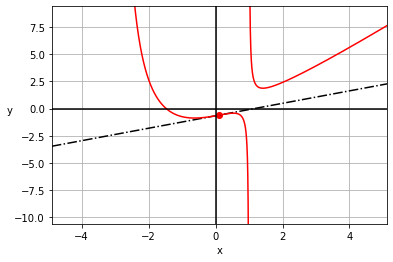

In [134]:
x = sp.Symbol("x")
x_peregiba = 0.11178182644262943

# построение точки перегиба
plt.plot(x_peregiba, f(x_peregiba), "ro")

# касательная в точке перегиба
x_plt = np.linspace(-50, 50, 5000)
print("Значение тангенса угла наклона касательной в точке перегиба: ", der(x_peregiba))
plt.plot(x_plt, f(x_peregiba) + der(x_peregiba) * (x_plt - (x_peregiba)), "k-.")

# построение функции
x = np.linspace(-20, -3.0001, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(-2.9999, 0.9999, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(1.0001, 20, 5000)
plt.plot(x, f(x), "r")

# установить границы оси
plt.ylim(f(x_peregiba) - 10, f(x_peregiba) + 10)
plt.xlim(x_peregiba - 5, x_peregiba + 5)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

Точки разрыва:

In [135]:
x = sp.Symbol("x")
print("Точка разрыва:", "-3")
a = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3), x, -3, dir="-")
b = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3), x, -3, dir="+")
print("f(x₀-0):", a)
print("f(x₀+0):", b)
print("Точка разрыва второго рода")

x = sp.Symbol("x")
print("\nТочка разрыва:", "1")
a = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3), x, 1, dir="-")
b = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3), x, 1, dir="+")
print("f(x₀-0):", a)
print("f(x₀+0):", b)
print("Точка разрыва второго рода")

Точка разрыва: -3
f(x₀-0): -oo
f(x₀+0): oo
Точка разрыва второго рода

Точка разрыва: 1
f(x₀-0): -oo
f(x₀+0): oo
Точка разрыва второго рода


Асимптоты:

*Вертикальные асимптоты: $x=-3$, $x=1$.*

In [136]:
from sympy.abc import x
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

k = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3) / x, x, sp.oo)
b = sp.limit((2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3) - k * x, x, sp.oo)
print("Наклонная асимптота:", k * x + b)

Наклонная асимптота: 2*x - 4


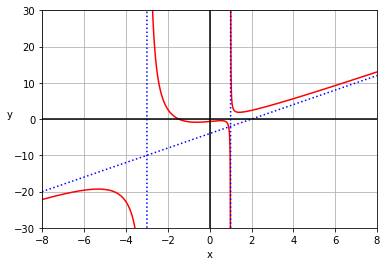

In [137]:
def f(x):
    return (2 * x**3 - 3 * x + 2) / (x**2 + 2 * x - 3)


# построение функции
x = np.linspace(-20, -3.0001, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(-2.9999, 0.9999, 5000)
plt.plot(x, f(x), "r")
x = np.linspace(1.0001, 20, 5000)
plt.plot(x, f(x), "r")

# построение асимптот
x = np.linspace(-30, 30, 5000)
plt.plot(x, 2 * x - 4, "b:")
x = np.linspace(-30, 30, 5000)
plt.plot(-3 + 0 * x, x, "b:")
x = np.linspace(-30, 30, 5000)
plt.plot(1 + 0 * x, x, "b:")

# установить границы оси
plt.ylim(-30, 30)
plt.xlim(-8, 8)

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()